# Bike sharing project

## Load necessary modules

### Start

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True
from dateutil import parser


## Prompt for user inputs

## Which of the three metro areas to you want to review?

#### (1) Chicago  
#### (2) New York City 
#### (3) Washington, DC (including nearby parts of MD and VA)
#### When prompted, enter 1, 2 or 3 for the city of interest


In [2]:
city_string=input("Enter 1 (for Chicago), 2 (for NYC) or 3 (for DC)" )

Enter 1 (for Chicago), 2 (for NYC) or 3 (for DC)3


In [3]:
if city_string in ('1','2','3'):
    city_indx=int(city_string)-1
    city_list=['Chicago','NYC','Washington']
    city_name=city_list[city_indx]
else:
    print("you must enter 1, 3, or 3")
    city_string=input("Enter 1 (for Chicago), 2 (for NYC) or 3 (for DC)")


In [4]:
city_name

'Washington'

## Which months do you want to analyze? 

#### (1) January
#### (2) February
#### (3) March
#### (4) April
#### (5) May
#### (6) June
#### (9) all six months
#### When prompted, enter a single integer between 1 and 6 for the month desired, or 9 for all months

In [5]:
month_string=input("enter an integer between 1 and 6 or 9 for all six months")

enter an integer between 1 and 6 or 9 for all six months9


In [6]:
if month_string in ('1','2','3','4','5','6','9'):
    month_num=int(month_string)
    month_indx=int(month_num)-1
else:
    print ("you must enter 9 (for all months) or a single number between 1 and 6")

In [7]:
month_dictionary={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',9:'all months'}
month_name=month_dictionary[month_num]
"You have chosen to view {0} data for {1}".format(city_name,month_name)

'You have chosen to view Washington data for all months'

### The data for the selected city will be loaded

In [11]:
path1='C:\\Python_Projects\\Udacity_data\\'
filename=path1+city_name+'.csv'
filename

'C:\\Python_Projects\\Udacity_data\\Washington.csv'

In [12]:
df=pd.read_csv(filename) # read bke share data for the city requested

In [13]:
df.shape

(300000, 7)

In [14]:
"The {0} dataframe has {1} observations and {2} variables".format(city_name,df.shape[0],df.shape[1])


'The Washington dataframe has 300000 observations and 7 variables'

In [15]:
filename2=path1+city_name+'_photo.png'
filename2

'C:\\Python_Projects\\Udacity_data\\Washington_photo.png'

In [16]:
from IPython.display import Image

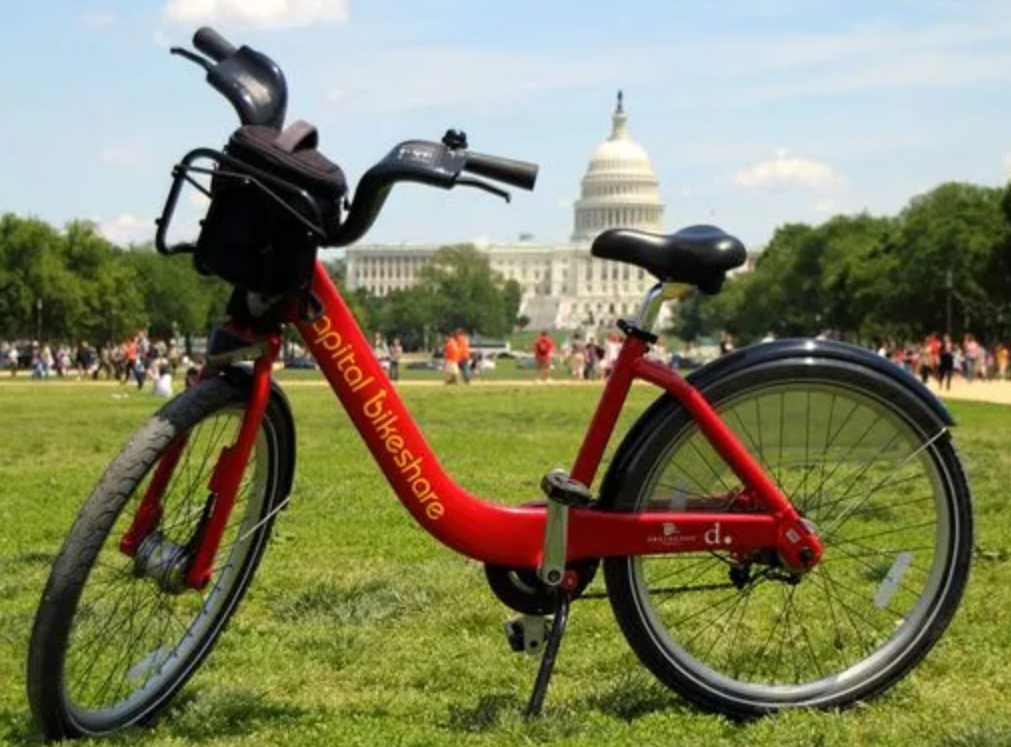

In [17]:
Image(filename=filename2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
Unnamed: 0       300000 non-null int64
Start Time       300000 non-null object
End Time         300000 non-null object
Trip Duration    300000 non-null float64
Start Station    300000 non-null object
End Station      300000 non-null object
User Type        300000 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 16.0+ MB


In [19]:
df.describe()

,Unnamed: 0,Trip Duration
count,3.000000e+05,3.000000e+05
mean,8.754044e+05,1.237280e+03
std,5.059335e+05,5.461997e+03
min,7.000000e+00,6.001000e+01
25%,4.363938e+05,4.106230e+02
50%,8.750635e+05,7.065015e+02
75%,1.313148e+06,1.229427e+03
max,1.751446e+06,1.235662e+06


In [20]:
df.columns

Index(['Unnamed: 0', 'Start Time', 'End Time', 'Trip Duration',
       'Start Station', 'End Station', 'User Type'],
      dtype='object')

In [21]:
df.head(10)

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type
0,1621326,6/21/2017 8:36,6/21/2017 8:44,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
1,482740,3/11/2017 10:40,3/11/2017 10:46,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
2,1330037,5/30/2017 1:02,5/30/2017 1:13,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
3,665458,4/2/2017 7:48,4/2/2017 8:19,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
4,1481135,6/10/2017 8:36,6/10/2017 9:02,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
5,1148202,5/14/2017 7:18,5/14/2017 7:24,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th ...,Subscriber
6,1594275,6/19/2017 8:41,6/19/2017 9:00,1105.429,Park Rd & Holmead Pl NW,8th & H St NW,Subscriber
7,1601832,6/20/2017 5:54,6/20/2017 6:05,636.218,1st & D St SE,Potomac & Pennsylvania Ave SE,Subscriber
8,574182,3/24/2017 20:37,3/24/2017 20:42,328.530,18th & R St NW,15th & P St NW,Subscriber
9,327058,2/20/2017 21:12,2/20/2017 21:31,1188.090,17th & Corcoran St NW,Lynn & 19th St North,Subscriber


## Questions about the users:

## How many total users of bike sharing were there for the month(s) selected above?

In [22]:
#create a month variable from the Start Time timestamp
df['Start_Month']=pd.DatetimeIndex(df['Start Time']).month 
#create a transactions variable
df['transactions']=1
pivot_users=pd.pivot_table(df,values='transactions',index='Start_Month',columns='User Type',aggfunc=sum,margins=True)


In [23]:
df.head(10)

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Start_Month,transactions
0,1621326,6/21/2017 8:36,6/21/2017 8:44,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,6,1
1,482740,3/11/2017 10:40,3/11/2017 10:46,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,3,1
2,1330037,5/30/2017 1:02,5/30/2017 1:13,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,5,1
3,665458,4/2/2017 7:48,4/2/2017 8:19,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,4,1
4,1481135,6/10/2017 8:36,6/10/2017 9:02,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,6,1
5,1148202,5/14/2017 7:18,5/14/2017 7:24,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th ...,Subscriber,5,1
6,1594275,6/19/2017 8:41,6/19/2017 9:00,1105.429,Park Rd & Holmead Pl NW,8th & H St NW,Subscriber,6,1
7,1601832,6/20/2017 5:54,6/20/2017 6:05,636.218,1st & D St SE,Potomac & Pennsylvania Ave SE,Subscriber,6,1
8,574182,3/24/2017 20:37,3/24/2017 20:42,328.530,18th & R St NW,15th & P St NW,Subscriber,3,1
9,327058,2/20/2017 21:12,2/20/2017 21:31,1188.090,17th & Corcoran St NW,Lynn & 19th St North,Subscriber,2,1


In [24]:
if month_num < 9:
    all_users_month=pivot_users.All[month_indx]
else:
    all_users_month=pivot_users.All[-1]
    

In [25]:
all_users_month

300000

In [26]:
"In {0},for {1}, there was a total of {2} users".format(city_name,month_name,all_users_month)

'In Washington,for all months, there was a total of 300000 users'

## What proportion of total users were subscribers?

In [27]:
if month_num < 9:
    subscriber_month=pivot_users.Subscriber[month_indx]
else:
    subscriber_month=pivot_users.Subscriber[-1]
    
subscriber_percent=100.0*subscriber_month/all_users_month
subscriber_percent=round(subscriber_percent,1)
subscriber_percent
    
    
    

73.6

In [28]:
"In {0}, for {1}, there were {2} subscribers, which is {3} percent of the total users.".format(city_name,month_name,subscriber_month,subscriber_percent)

'In Washington, for all months, there were 220786 subscribers, which is 73.6 percent of the total users.'

### What is the gender mix of users?

In [29]:
df.columns

Index(['Unnamed: 0', 'Start Time', 'End Time', 'Trip Duration',
       'Start Station', 'End Station', 'User Type', 'Start_Month',
       'transactions'],
      dtype='object')

In [32]:
if city_string == '3':
    print("no gender detail available")
else:
    pivot_gender=pd.pivot_table(df,values='transactions',index='Start_Month',columns='Gender',aggfunc=sum,margins=True)
    pivot_female=pivot_gender['Female']
    pivot_female_pct=round((100.0*pivot_gender['Female'] / pivot_gender['All']),1)
    if month_num < 9: 
        pivot_female_month=pivot_female[month_indx]
        pivot_fem_pct_month=pivot_female_pct[month_indx]
    else:
        pivot_female_month=pivot_female[-1]
        pivot_fem_pct_month=pivot_female_pct[-1]

        


no gender detail available


In [31]:
"In {0}, for {1}, there were {2} female users, which was {3}% of the total".format(city_name,month_name,pivot_female_month,pivot_fem_pct_month)

NameError: name 'pivot_female_month' is not defined

### What is the age breakdown of the users?

In [33]:
df.shape

(300000, 9)

In [34]:
df.columns

Index(['Unnamed: 0', 'Start Time', 'End Time', 'Trip Duration',
       'Start Station', 'End Station', 'User Type', 'Start_Month',
       'transactions'],
      dtype='object')

In [35]:
# start by filtering the df for t_he selected month
if month_num < 9:
    df_filtered=df[(df.Start_Month==month_num)]
else:
    df_filtered=df
    
df_filtered.shape

(300000, 9)

In [36]:
df_filtered.shape

(300000, 9)

In [37]:
df_filtered.columns

Index(['Unnamed: 0', 'Start Time', 'End Time', 'Trip Duration',
       'Start Station', 'End Station', 'User Type', 'Start_Month',
       'transactions'],
      dtype='object')

In [38]:
def f_age_bin(age):
    age_bin=[]
    if age < 20:
        age_bin='(01)<20'
        return age_bin
    elif age >= 20 and age < 25:
        age_bin='(02)20-24'
        return age_bin
    elif age >=25 and age <30:
        age_bin='(03)25-29'
        return age_bin
    elif age >= 30 and age < 35:
        age_bin='(04)30-34'
        return age_bin
    elif age >= 35 and age < 40:
        age_bin='(05)35-39'
        return age_bin
    elif age >=40 and age < 45:
        age_bin='(06)40-44'
        return age_bin
    elif age >=45 and age < 50:
        age_bin='(07)45-49'
        return age_bin
    elif age >= 50 and age < 55:
        age_bin='(08)50-54'
        return age_bin
    elif age >= 55 and age < 60:
        age_bin='(09)55-59'
        return age_bin
    elif age >= 60 and age < 65:
        age_bin='(10)60-64'
        return age_bin
    elif age >= 65:
        age_bin='(11)65+'
        return age_bin
    else:
        age_bin='(12)unk'
        return age_bin
    
    
   
    

In [39]:
if city_string !='3':
    df_filtered_r=df_filtered.rename(index=str,columns={"Birth Year":"Birth_Year","Start Time":"Start_Time"})
    df_filtered_r['Age']    =df_filtered_r.Birth_Year.apply(lambda x:(2017-x))
    df_filtered_r['Age_Bin']=df_filtered_r.Age.apply(f_age_bin)
    pivot_age_bins=pd.pivot_table(df_filtered_r,values='transactions',index='Age_Bin',aggfunc=sum,margins=True) 
    tot_transactions=pivot_age_bins.transactions[-1]
    pivot_age_bins['Age_pct']=round(100*(pivot_age_bins.transactions/tot_transactions),1)
    print(pivot_age_bins)
else:
    df_filtered_r=df_filtered
    "Age cannot be calculated for this dataframe"

# How the system is utilized


## Which day of the week and hour of the day are most common?

In [40]:
df_filtered.columns

Index(['Unnamed: 0', 'Start Time', 'End Time', 'Trip Duration',
       'Start Station', 'End Station', 'User Type', 'Start_Month',
       'transactions'],
      dtype='object')

In [41]:
df_filtered.head(10)

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Start_Month,transactions
0,1621326,6/21/2017 8:36,6/21/2017 8:44,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,6,1
1,482740,3/11/2017 10:40,3/11/2017 10:46,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,3,1
2,1330037,5/30/2017 1:02,5/30/2017 1:13,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,5,1
3,665458,4/2/2017 7:48,4/2/2017 8:19,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,4,1
4,1481135,6/10/2017 8:36,6/10/2017 9:02,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,6,1
5,1148202,5/14/2017 7:18,5/14/2017 7:24,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th ...,Subscriber,5,1
6,1594275,6/19/2017 8:41,6/19/2017 9:00,1105.429,Park Rd & Holmead Pl NW,8th & H St NW,Subscriber,6,1
7,1601832,6/20/2017 5:54,6/20/2017 6:05,636.218,1st & D St SE,Potomac & Pennsylvania Ave SE,Subscriber,6,1
8,574182,3/24/2017 20:37,3/24/2017 20:42,328.530,18th & R St NW,15th & P St NW,Subscriber,3,1
9,327058,2/20/2017 21:12,2/20/2017 21:31,1188.090,17th & Corcoran St NW,Lynn & 19th St North,Subscriber,2,1


In [42]:
#create a Starting_Hour variable from the Start Time timestamp
df_filtered_r=df_filtered.rename(index=str,columns={"Start Time":"Start_Time","Start Station":"Start_Station","End Station":"End_Station","Trip Duration":"Trip_Duration"})
df_filtered_r['Starting_Hour']=pd.DatetimeIndex(df_filtered_r.Start_Time).hour
pivot_peak_hour=pd.pivot_table(df_filtered_r,values='transactions',index='Starting_Hour',columns='Start_Month',aggfunc=sum,margins=True)
pivot_peak_hour

Start_Month,1,2,3,4,5,6,All
Starting_Hour,,,,,,,
0,214.0,223.0,219.0,NaN,NaN,NaN,656
1,144.0,144.0,98.0,4097.0,3602.0,3857.0,11942
2,74.0,75.0,56.0,4006.0,3527.0,3823.0,11561
3,36.0,47.0,33.0,4357.0,3863.0,3954.0,12290
4,31.0,38.0,45.0,5227.0,4855.0,5027.0,15223
5,202.0,220.0,229.0,7352.0,7007.0,7921.0,22931
6,694.0,860.0,857.0,6903.0,6421.0,7646.0,23381
7,1857.0,2236.0,2368.0,7112.0,6801.0,8474.0,28848
8,2993.0,3661.0,3963.0,6836.0,6688.0,8878.0,33019


In [43]:
pivot_hour_sorted=pivot_peak_hour.sort_values('All')
pivot_hour_sorted

Start_Month,1,2,3,4,5,6,All
Starting_Hour,,,,,,,
0,214.0,223.0,219.0,NaN,NaN,NaN,656
23,327.0,406.0,424.0,NaN,NaN,NaN,1157
22,556.0,704.0,782.0,NaN,NaN,NaN,2042
21,833.0,986.0,1100.0,NaN,NaN,NaN,2919
20,1050.0,1280.0,1526.0,NaN,NaN,NaN,3856
19,1691.0,2013.0,2420.0,NaN,NaN,NaN,6124
14,1587.0,2192.0,2376.0,NaN,NaN,NaN,6155
13,1619.0,2224.0,2399.0,NaN,NaN,NaN,6242
15,1817.0,2578.0,2798.0,NaN,NaN,NaN,7193


In [44]:
pivot_hour_sorted.iloc[-2]

Start_Month
1       2993.0
2       3661.0
3       3963.0
4       6836.0
5       6688.0
6       8878.0
All    33019.0
Name: 8, dtype: float64

### The peak hours tend to be morning or evening commuting times. On weekends, its a different story.

In [45]:

#create a day-of-week (Starting_DoW) variable from the Start Time timestamp
df_filtered_r['Starting_DoW']=pd.DatetimeIndex(df_filtered_r.Start_Time).dayofweek
df_filtered_r.Starting_DoW.head(10)

0    2
1    5
2    1
3    6
4    5
5    6
6    0
7    1
8    4
9    0
Name: Starting_DoW, dtype: int64

In [46]:
from dateutil import parser
df_filtered_r['DoW_num']=pd.DatetimeIndex(df_filtered_r.Start_Time).weekday
df_filtered_r.DoW_num.head(10)

0    2
1    5
2    1
3    6
4    5
5    6
6    0
7    1
8    4
9    0
Name: DoW_num, dtype: int64

In [51]:
df_filtered_r['DoW_name']=pd.DatetimeIndex(df_filtered_r.Start_Time).weekday_name
df_filtered_r.DoW_name.head(10)

0    Wednesday
1     Saturday
2      Tuesday
3       Sunday
4     Saturday
5       Sunday
6       Monday
7      Tuesday
8       Friday
9       Monday
Name: DoW_name, dtype: object

In [48]:
df_filtered_r['DoW_nm']=df_filtered_r.DoW_num.map({0:'0_Mon',1:'1_Tue',2:'2_Wed',3:'3_Thu',4:'4_Fri',5:'5_Sat',6:'6_Sun'})
df_filtered_r[['DoW_num','DoW_nm']].head(10)

,DoW_num,DoW_nm
0,2,2_Wed
1,5,5_Sat
2,1,1_Tue
3,6,6_Sun
4,5,5_Sat
5,6,6_Sun
6,0,0_Mon
7,1,1_Tue
8,4,4_Fri
9,0,0_Mon


In [49]:
pivot_DoW=pd.pivot_table(df_filtered_r,values='transactions',index='DoW_nm',columns='Start_Month',aggfunc=sum,margins=True)
pivot_DoW

Start_Month,1,2,3,4,5,6,All
DoW_nm,,,,,,,
0_Mon,3272,5759,6136,7079,9663,8021,39930
1_Tue,5148,5728,5348,8547,10243,9505,44519
2_Wed,5273,6186,7565,8765,10796,9571,48156
3_Thu,5258,5318,7565,8166,5912,11727,43946
4_Fri,4469,5581,5543,8906,7230,11551,43280
5_Sat,3015,5338,5944,9965,6712,9619,40593
6_Sun,3618,5022,3762,11192,7637,8345,39576
All,30053,38932,41863,62620,58193,68339,300000


## Transactions sorted by day of the week for the given month(s)

In [52]:
pivot_DoW_sorted=pivot_DoW.sort_values('All')
pivot_DoW_sorted

Start_Month,1,2,3,4,5,6,All
DoW_nm,,,,,,,
6_Sun,3618,5022,3762,11192,7637,8345,39576
0_Mon,3272,5759,6136,7079,9663,8021,39930
5_Sat,3015,5338,5944,9965,6712,9619,40593
4_Fri,4469,5581,5543,8906,7230,11551,43280
3_Thu,5258,5318,7565,8166,5912,11727,43946
1_Tue,5148,5728,5348,8547,10243,9505,44519
2_Wed,5273,6186,7565,8765,10796,9571,48156
All,30053,38932,41863,62620,58193,68339,300000


In [53]:
pivot_DoW_sorted.iloc[-2]

Start_Month
1       5273
2       6186
3       7565
4       8765
5      10796
6       9571
All    48156
Name: 2_Wed, dtype: int64

In [55]:
pivot_hr_day=pd.pivot_table(df_filtered_r,values='transactions',index='Starting_Hour',columns='DoW_nm',aggfunc=sum,margins=True)
pivot_hr_day

DoW_nm,0_Mon,1_Tue,2_Wed,3_Thu,4_Fri,5_Sat,6_Sun,All
Starting_Hour,,,,,,,,
0,87,51,54,74,86,134,170,656
1,1310,1278,1280,1206,1663,2463,2742,11942
2,1264,1233,1188,1130,1666,2468,2612,11561
3,1396,1403,1402,1393,1829,2423,2444,12290
4,1980,2150,2289,1954,2260,2192,2398,15223
5,3425,4133,4098,3688,3341,2025,2221,22931
6,3580,4320,4409,3878,3304,1895,1995,23381
7,4247,5418,5816,5186,4325,1950,1906,28848
8,4564,6113,6615,5946,5347,2385,2049,33019


# Most popular stations and routes
## Which is the most popular starting station?

In [56]:
df_filtered_r.columns

Index(['Unnamed: 0', 'Start_Time', 'End Time', 'Trip_Duration',
       'Start_Station', 'End_Station', 'User Type', 'Start_Month',
       'transactions', 'Starting_Hour', 'Starting_DoW', 'DoW_num', 'DoW_name',
       'DoW_nm'],
      dtype='object')

In [57]:
starting_station=pd.pivot_table(df_filtered_r,values='transactions',index='Start_Station',columns='Start_Month',aggfunc=sum,margins=True)
starting_station

Start_Month,1,2,3,4,5,6,All
Start_Station,,,,,,,
10th & E St NW,99.0,132.0,165.0,275.0,250.0,286.0,1207
10th & Florida Ave NW,93.0,101.0,108.0,173.0,144.0,160.0,779
10th & G St NW,97.0,124.0,97.0,196.0,167.0,212.0,893
10th & K St NW,172.0,214.0,189.0,309.0,288.0,336.0,1508
10th & Monroe St NE,39.0,43.0,37.0,61.0,56.0,59.0,295
10th & U St NW,168.0,172.0,165.0,295.0,322.0,332.0,1454
10th St & Constitution Ave NW,89.0,189.0,217.0,412.0,329.0,447.0,1683
10th St & L'Enfant Plaza SW,51.0,66.0,55.0,132.0,102.0,133.0,539
11th & F St NW,120.0,150.0,143.0,218.0,155.0,227.0,1013


In [58]:
starting_station_sorted=starting_station.sort_values('All') 
starting_station_sorted

Start_Month,1,2,3,4,5,6,All
Start_Station,,,,,,,
Columbus Ave & Gramercy Blvd,NaN,NaN,NaN,NaN,1.0,1.0,2
Columbia Pike & S Taylor St,NaN,NaN,NaN,NaN,2.0,1.0,3
Key West Ave & Great Seneca Hwy,NaN,NaN,NaN,NaN,3.0,NaN,3
Reston Pkwy & Spectrum Dr,NaN,NaN,NaN,NaN,1.0,3.0,4
Solutions & Greensboro Dr,2.0,NaN,NaN,NaN,2.0,NaN,4
Shady Grove Hospital,1.0,2.0,1.0,NaN,NaN,NaN,4
North Shore & Cameron Crescent Dr/Crescent Apartments,NaN,NaN,3.0,2.0,NaN,NaN,5
Reston Regional Library,NaN,1.0,NaN,NaN,4.0,1.0,6
Traville Gateway Dr & Gudelsky Dr,1.0,NaN,NaN,NaN,2.0,3.0,6


In [59]:
starting_station_sorted.iloc[-2]

Start_Month
1       671.0
2       847.0
3       893.0
4      1148.0
5      1011.0
6      1086.0
All    5656.0
Name: Columbus Circle / Union Station, dtype: float64

#### The most popular starting point is shown in the line above for the selected month(s).

## What was the most popular destination?

In [60]:
ending_station=pd.pivot_table(df_filtered_r,values='transactions',index='End_Station',columns='Start_Month',aggfunc=sum,margins=True)
ending_station_sorted=ending_station.sort_values('All') 
ending_station_sorted

Start_Month,1,2,3,4,5,6,All
End_Station,,,,,,,
Columbia Pike & S Taylor St,NaN,NaN,NaN,NaN,1.0,NaN,1
Nebraska Ave/AU East Campus,NaN,NaN,NaN,NaN,NaN,2.0,2
Shady Grove Hospital,NaN,2.0,NaN,NaN,NaN,NaN,2
Broschart & Blackwell Rd,NaN,NaN,1.0,NaN,2.0,NaN,3
Key West Ave & Great Seneca Hwy,NaN,NaN,NaN,NaN,3.0,1.0,4
Reston Pkwy & Spectrum Dr,NaN,NaN,NaN,NaN,3.0,1.0,4
Solutions & Greensboro Dr,1.0,1.0,1.0,NaN,1.0,NaN,4
Garland Ave & Walden Rd,1.0,1.0,4.0,NaN,NaN,NaN,6
Reston Regional Library,NaN,1.0,NaN,1.0,1.0,3.0,6


In [61]:
ending_station_sorted.iloc[-2]

Start_Month
1       698.0
2       946.0
3       897.0
4      1089.0
5      1158.0
6      1260.0
All    6048.0
Name: Columbus Circle / Union Station, dtype: float64

#### The most popular destination for the selected month(s) is shown in the line above.

In [62]:
## Analysis of ride durations

In [63]:
import statistics as stat
mean_dur=round(stat.mean(df_filtered_r['Trip_Duration'])/60,1)
   

In [64]:
"The mean duration of bike rides was {0} (in minutes)".format(mean_dur)

'The mean duration of bike rides was 20.6 (in minutes)'

In [65]:
import matplotlib.pyplot as plt


In [66]:
%matplotlib inline
df_filtered_r['Trip_Minutes']=round((df_filtered_r.Trip_Duration/60),1)
df_filtered_r.Trip_Minutes.head()

0     8.2
1     6.7
2    10.6
3    30.5
4    25.8
Name: Trip_Minutes, dtype: float64

In [67]:
Trip_minutes=np.array(df_filtered_r.Trip_Minutes)
Trip_minutes_mean=round(np.mean(Trip_minutes))
Trip_minutes_mean

21.0

In [68]:
Trip_minutes[0:5]


array([ 8.2,  6.7, 10.6, 30.5, 25.8])

Text(0.5, 1.0, 'Histogram of trip duration, with mean shown in red')

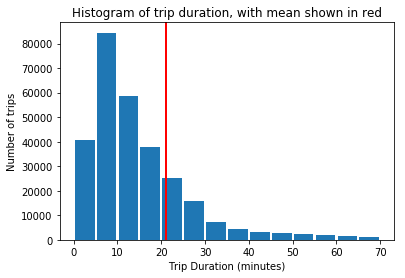

In [69]:
plt.hist(Trip_minutes,bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], rwidth=.90)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of trips')
plt.axvline(x=Trip_minutes_mean, linewidth=2, color='red')
plt.legend
plt.title('Histogram of trip duration, with mean shown in red')

In [ ]:
%matplotlib notebook
%matplotlib notebook



## This completes the analysis of the selected city and month(s)

In [ ]:
# To analyze a different city or different month, click on Start link


    
[Link to Start](#Start)
    


In [ ]:
vars=df.columns
vars
has_gender='Gender'in vars
has_gender
if "Gender" in df.columns:
    x=1
else:
    x=0
print(x)    


In [ ]:
city_string=input("Please confirm your interest in NYC by entering 2" )

In [ ]:
city_indx=int(city_string)-1
city_indx

In [ ]:
city_list=['Chicago','NYC','Washington']
city_list

In [ ]:
city_name=city_list[city_indx]
city_name

In [ ]:
path1='C:\\Python_Projects\\Udacity_data\\'
filename=path1+city_name+'.csv'
filename

path1='C:\\Python_Projects\\Udacity_data\\'
filename=path1+city_name+'.csv'
filename

In [ ]:
df=pd.read_csv(filename) #read data for NYC

In [ ]:
df.shape

In [ ]:
city_name=city_list[city_indx]
city_name

In [ ]:
"The {0} dataframe has {1} observations and {2} variables".format(city_name,df.shape[0],df.shape[1])
